In [9]:
# Speed recalibration function
def rescale_velocities(velocities, T0, N, d):
    # Calculate the kinetic energy of the current system.
    v_s = np.sum(velocities**2, axis=1)
    ke = 0.5 * np.sum(v_s)  # Current kinetic energy
    ke_target = N * T0  # Target kinetic energy
    scaling_factor = np.sqrt(ke_target / ke)  # Calculate the scaling factor
    velocities *= scaling_factor  # Rescale the velocity
    return velocities


In [10]:
# Run the simulation and apply temperature recalibration
stats = {'T': [], 'E': [], 'K': []}  # "Store temperature, energy, and kinetic energy
for step in range(max_steps):
    # New velocity and recalibrate
    velocities += np.random.randn(N, d) * 0.01  # Add small perturbations at each step
    velocities = rescale_velocities(velocities, T0, N, d)  # Apply velocity recalibration

    # Calculate the current kinetic energy, total energy, and temperature
    v_s = np.sum(velocities**2, axis=1)
    ke = 0.5 * np.sum(v_s)  # kinetic
    E = ke  # total energy
    T = np.sum(v_s) / (N * d)  # temperature

    stats['T'].append(T)
    stats['E'].append(E)
    stats['K'].append(ke)

    # Apply velocity recalibration every 10 steps
    if step % 10 == 0:
        velocities = rescale_velocities(velocities, T0, N, d)


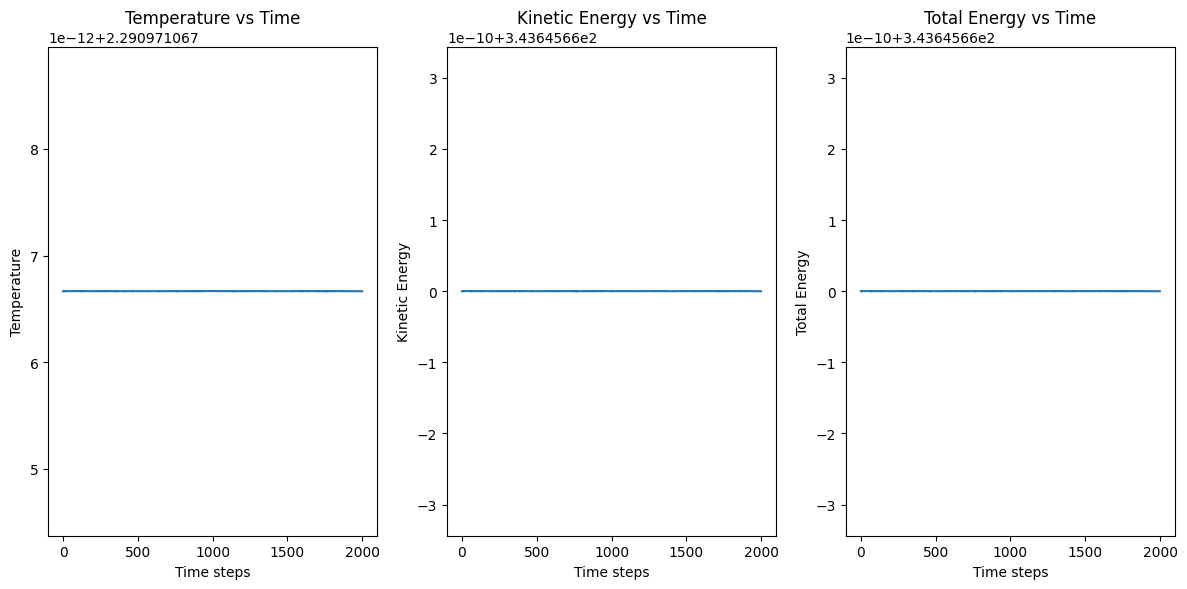

In [11]:
# Apply velocity recalibration every 10 steps
steps = np.arange(len(stats['T']))
plt.figure(figsize=(12, 6))

# Temperature curve
plt.subplot(1, 3, 1)
plt.plot(steps, stats['T'])
plt.xlabel('Time steps')
plt.ylabel('Temperature')
plt.title('Temperature vs Time')

# Kinetic energy curve
plt.subplot(1, 3, 2)
plt.plot(steps, stats['K'])
plt.xlabel('Time steps')
plt.ylabel('Kinetic Energy')
plt.title('Kinetic Energy vs Time')

# Total energy curve
plt.subplot(1, 3, 3)
plt.plot(steps, stats['E'])
plt.xlabel('Time steps')
plt.ylabel('Total Energy')
plt.title('Total Energy vs Time')

plt.tight_layout()
plt.show()
